In [1]:
from CGAT import Database
%matplotlib inline
database = "/ifs/projects/proj028/TREX_iCLIP_3reps/csvdb"
kmers = Database.fetch_DataFrame('''SELECT * 
                                        FROM sig_bases_kmers 
                                        WHERE  replicate='union' ''', database)
import pandas
kmers["Z"] = kmers["Z"].astype("float")
kmers = kmers.pivot("Kmer", "factor", "Z")
kmers = kmers[~kmers.index.str.contains("N")]
kmers.head()

factor,Alyref,Chtop,Cntrl,Nxf1
Kmer,,,,
AAAAAA,125.613185,188.244104,38.430101,73.283610
AAAAAAA,132.292874,183.731303,33.721514,80.262210
AAAAAAC,44.734573,74.485090,14.343858,25.038826
AAAAAAG,40.572644,48.742293,20.061249,26.208170
AAAAAAT,36.026653,51.154033,11.807804,31.893507


In [6]:
Ts = kmers.index.str.count("T")

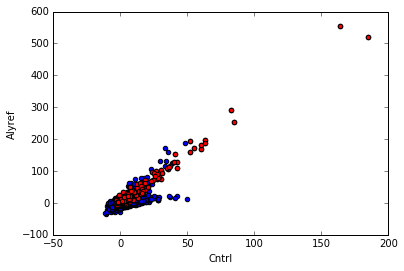

In [7]:
import matplotlib.pyplot as plt
ax = kmers.plot(x="Cntrl", y="Alyref", kind="scatter")
kmers[Ts>=5].plot(x="Cntrl", y="Alyref", ax=ax,kind="scatter", color="red")

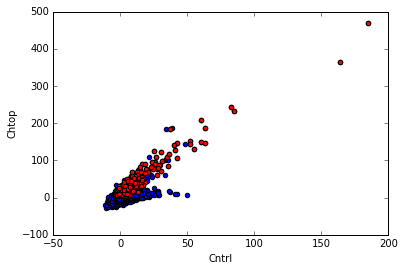

In [9]:
ax=kmers.plot(x="Cntrl", y="Chtop", kind="scatter")
kmers[Ts>=5].plot(x="Cntrl", y="Chtop", ax=ax,kind="scatter", color="red")

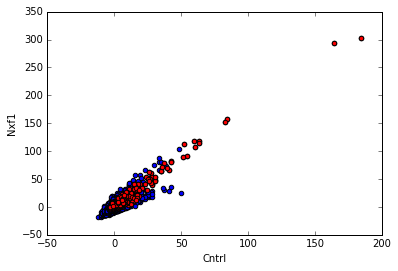

In [10]:
ax = kmers.plot(x="Cntrl", y="Nxf1", kind="scatter")
kmers[Ts>=5].plot(x="Cntrl", y="Nxf1", ax=ax,kind="scatter", color="red")

In [11]:
rs = kmers.corr()["Cntrl"]
sds=kmers.std()
slopes = rs*(sds/sds["Cntrl"])
ms = kmers.mean()
intercept= ms - slopes*ms["Cntrl"]
normed_kmers = kmers / slopes - intercept
distance = normed_kmers.subtract(normed_kmers["Cntrl"], axis='index')


In [15]:
distance[Ts<5].sort_values("Alyref", ascending=False).head(n=20)

factor,Alyref,Chtop,Cntrl,Nxf1
Kmer,,,,
TTTGAGA,60.403905,28.085292,0.0,31.856690
TTTTGAG,52.779935,37.855507,0.0,28.412558
TTTTGA,50.802867,25.313213,0.0,25.194648
TTGAGAC,41.643967,22.790114,0.0,25.430449
AAAAAAA,37.642882,76.972933,0.0,26.028008
TTGAGA,34.879944,13.451896,0.0,25.692831
TTGAGAT,29.553519,16.756578,0.0,20.519105
AAAAAA,29.333512,74.969594,0.0,16.144685
TTTGAG,28.673474,3.548890,0.0,16.158317
